In [1]:
import pandas as pd

america_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_american_drug.csv')
y_test=america_df['True']
y_pred_prob=america_df['Predicted']

lithuania_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_lithuanian_drug.csv')
y_test_lithuania=lithuania_df['True']
y_pred_prob_lithuania=lithuania_df['Predicted']

metastasis_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_metastasis_drug.csv')
y_test_metastasis=metastasis_df['True']
y_pred_prob_metastasis=metastasis_df['Predicted']

china_df=pd.read_csv('/home/sr933/rcc/data/predicted_prob_china_drugs.csv')
y_test_china=china_df['True']
y_pred_prob_china=china_df['Predicted']

AUC for American:  0.946209764648482
AUC for China:  0.9611353401270667
AUC for Lithuania:  0.9893885648681958
AUC for Metastasis:  0.6249590595088307


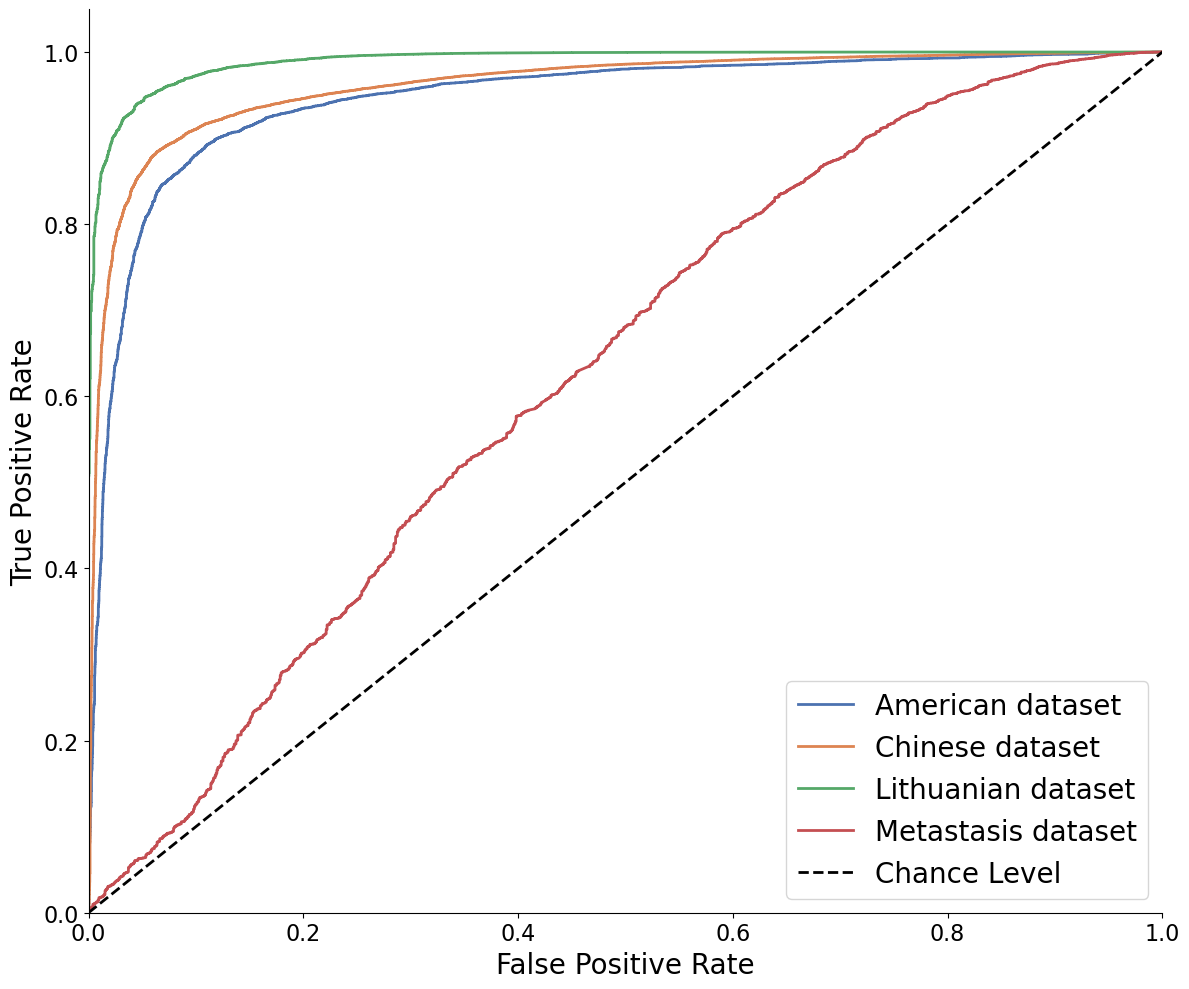

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
colors = sns.color_palette("deep")
fig, ax = plt.subplots(figsize=(12, 10))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.plot(fpr, tpr, color=colors[0], lw=2, label="American dataset")
print("AUC for American: ", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test_china, y_pred_prob_china)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.plot(fpr, tpr, color=colors[1], lw=2, label="Chinese dataset")
print("AUC for China: ", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test_lithuania, y_pred_prob_lithuania)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.plot(fpr, tpr, color=colors[2], lw=2, label="Lithuanian dataset")
print("AUC for Lithuania: ", roc_auc)


fpr, tpr, thresholds = roc_curve(y_test_metastasis, y_pred_prob_metastasis)
# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.plot(fpr, tpr, color=colors[3], lw=2, label="Metastasis dataset")
print("AUC for Metastasis: ", roc_auc)


# Plotting the diagonal line (chance level ROC curve)
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--', label='Chance Level')
ax.tick_params(axis='both', which='major', labelsize=16)

# Customize spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# Titles and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend(loc="lower right", fontsize=20)
plt.tight_layout()
plt.savefig('/home/sr933/output/roc_curve_drug.png', dpi=900)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to calculate metrics
def evaluate_model(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).astype(int)  # Convert probabilities to binary predictions
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, zero_division=0), 2)
    recall = round(recall_score(y_true, y_pred), 2)
    f1 = round(f1_score(y_true, y_pred), 2)
    auc = round(roc_auc_score(y_true, y_pred_prob), 2)
    return [accuracy, precision, recall, f1, auc]

# Calculate metrics for each dataset
datasets = {
    "American": (y_test, y_pred_prob),
    "Chinese": (y_test_china, y_pred_prob_china),
    "Lithuanian": (y_test_lithuania, y_pred_prob_lithuania),
    "Metastasis": (y_test_metastasis, y_pred_prob_metastasis)
}

# Create a results dictionary
results = {name: evaluate_model(y_true, y_pred_prob) for name, (y_true, y_pred_prob) in datasets.items()}

# Convert results to a DataFrame for better visualization
metrics_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Print the table
print(metrics_df)


            Accuracy  Precision  Recall  F1 Score   AUC
American        0.76       0.97    0.57      0.72  0.95
Chinese         0.91       0.98    0.92      0.95  0.96
Lithuanian      0.98       0.98    1.00      0.99  0.99
Metastasis      0.91       0.99    0.92      0.95  0.62
